In [1]:
import pulp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
universe = pd.read_csv("diff_clean_all.csv", header=[0,1], index_col=[0], parse_dates=True)

In [3]:
pf_components = [("Equity","CSPX.L"), ("Equity", "MEUD.L"), ("Equity","CJPU.L"),("Equity","ISP6.L"), ("Equity","CSEMUS.SW"),("Equity","CECD.LN"),("Equity","CEMA.L"),("Equity","PAF.L"),("Real Estate","IPRP.AS"),("Commodities","CRB.PA")]

In [4]:
portfolio = universe[pf_components].copy()

In [5]:
portfolio.index

DatetimeIndex(['2016-07-01', '2016-07-04', '2016-07-05', '2016-07-06',
               '2016-07-07', '2016-07-08', '2016-07-11', '2016-07-12',
               '2016-07-13', '2016-07-14',
               ...
               '2021-06-17', '2021-06-18', '2021-06-21', '2021-06-22',
               '2021-06-23', '2021-06-24', '2021-06-25', '2021-06-28',
               '2021-06-29', '2021-06-30'],
              dtype='datetime64[ns]', name='Date', length=1281, freq=None)

In [6]:
portfolio.head()

Equity                                                    \
              CSPX.L    MEUD.L    CJPU.L    ISP6.L CSEMUS.SW   CECD.LN   
Date                                                                     
2016-07-01  0.010468  0.012539 -0.006062  0.016937  0.015686 -0.006000   
2016-07-04  0.000507 -0.010110  0.007559 -0.002939 -0.010635 -0.003696   
2016-07-05 -0.008253 -0.000440  0.000000  0.006457 -0.021772 -0.015147   
2016-07-06  0.000000 -0.006454 -0.016199  0.012552 -0.018057 -0.008788   
2016-07-07  0.006458  0.008168  0.000000  0.005510  0.016964  0.012666   

                               Real Estate Commodities  
              CEMA.L     PAF.L     IPRP.AS      CRB.PA  
Date                                                    
2016-07-01  0.011761 -0.052632    0.006613    0.003433  
2016-07-04 -0.000554  0.125000   -0.001577   -0.001244  
2016-07-05 -0.014123 -0.024691   -0.014607   -0.014014  
2016-07-06 -0.012828  0.189873   -0.014957   -0.009160  
2016-07-07  0.013469 -0.031915    0.002440   -0.002869

In [7]:
pf_stats = pd.DataFrame([portfolio.mean(axis=0), portfolio.apply(lambda x: np.log(1+x)).var(axis=0)], index=["return_pd","risk_pd"])

In [8]:
pf_stats = pf_stats.transpose()

In [9]:
rf_rate = 0.011
trade_days = 250

pf_stats["excess_return_pa"] = pf_stats["return_pd"] * trade_days - rf_rate
pf_stats["var_pa"] = pf_stats["risk_pd"] * trade_days

In [10]:
cov_matrix = portfolio.apply(lambda x: np.log(1+x)).cov()
cov_matrix_pa = cov_matrix * trade_days

In [11]:
cov_matrix_pa

Equity                                          \
                         CSPX.L    MEUD.L    CJPU.L    ISP6.L CSEMUS.SW   
Equity      CSPX.L     0.026103  0.018657  0.019261  0.024903  0.019922   
            MEUD.L     0.018657  0.030630  0.016794  0.024230  0.019906   
            CJPU.L     0.019261  0.016794  0.024455  0.018841  0.017869   
            ISP6.L     0.024903  0.024230  0.018841  0.045762  0.021563   
            CSEMUS.SW  0.019922  0.019906  0.017869  0.021563  0.026691   
            CECD.LN    0.023248  0.022717  0.022040  0.020452  0.024595   
            CEMA.L     0.023228  0.020052  0.020881  0.020954  0.021656   
            PAF.L      0.002724  0.009339  0.004364 -0.002109  0.004740   
Real Estate IPRP.AS    0.015562  0.015426  0.013697  0.015667  0.018521   
Commodities CRB.PA     0.011793  0.009763  0.008499  0.014917  0.011320   

                                                    Real Estate Commodities  
                        CECD.LN    CEMA.L     PAF.L     IPRP.AS      CRB.PA  
Equity      CSPX.L     0.023248  0.023228  0.002724    0.015562    0.011793  
            MEUD.L     0.022717  0.020052  0.009339    0.015426    0.009763  
            CJPU.L     0.022040  0.020881  0.004364    0.013697    0.008499  
            ISP6.L     0.020452  0.020954 -0.002109    0.015667    0.014917  
            CSEMUS.SW  0.024595  0.021656  0.004740    0.018521    0.011320  
            CECD.LN    0.048540  0.029054  0.016536    0.017869    0.011580  
            CEMA.L     0.029054  0.037255  0.009932    0.015874    0.011801  
            PAF.L      0.016536  0.009932  0.327307    0.008758    0.000626  
Real Estate IPRP.AS    0.017869  0.015874  0.008758    0.028308    0.009390  
Commodities CRB.PA     0.011580  0.011801  0.000626    0.009390    0.028625

In [12]:
cov_matrix

Equity                                          \
                         CSPX.L    MEUD.L    CJPU.L    ISP6.L CSEMUS.SW   
Equity      CSPX.L     0.000104  0.000075  0.000077  0.000100  0.000080   
            MEUD.L     0.000075  0.000123  0.000067  0.000097  0.000080   
            CJPU.L     0.000077  0.000067  0.000098  0.000075  0.000071   
            ISP6.L     0.000100  0.000097  0.000075  0.000183  0.000086   
            CSEMUS.SW  0.000080  0.000080  0.000071  0.000086  0.000107   
            CECD.LN    0.000093  0.000091  0.000088  0.000082  0.000098   
            CEMA.L     0.000093  0.000080  0.000084  0.000084  0.000087   
            PAF.L      0.000011  0.000037  0.000017 -0.000008  0.000019   
Real Estate IPRP.AS    0.000062  0.000062  0.000055  0.000063  0.000074   
Commodities CRB.PA     0.000047  0.000039  0.000034  0.000060  0.000045   

                                                    Real Estate Commodities  
                        CECD.LN    CEMA.L     PAF.L     IPRP.AS      CRB.PA  
Equity      CSPX.L     0.000093  0.000093  0.000011    0.000062    0.000047  
            MEUD.L     0.000091  0.000080  0.000037    0.000062    0.000039  
            CJPU.L     0.000088  0.000084  0.000017    0.000055    0.000034  
            ISP6.L     0.000082  0.000084 -0.000008    0.000063    0.000060  
            CSEMUS.SW  0.000098  0.000087  0.000019    0.000074    0.000045  
            CECD.LN    0.000194  0.000116  0.000066    0.000071    0.000046  
            CEMA.L     0.000116  0.000149  0.000040    0.000063    0.000047  
            PAF.L      0.000066  0.000040  0.001309    0.000035    0.000003  
Real Estate IPRP.AS    0.000071  0.000063  0.000035    0.000113    0.000038  
Commodities CRB.PA     0.000046  0.000047  0.000003    0.000038    0.000115

In [13]:
pf_stats["std_pa"] = pf_stats["var_pa"]**(1/2)
pf_stats

return_pd   risk_pd  excess_return_pa    var_pa  \
Equity      CSPX.L      0.000686  0.000104          0.160378  0.026103   
            MEUD.L      0.000446  0.000123          0.100428  0.030630   
            CJPU.L      0.000412  0.000098          0.091922  0.024455   
            ISP6.L      0.000596  0.000183          0.137893  0.045762   
            CSEMUS.SW   0.000530  0.000107          0.121387  0.026691   
            CECD.LN     0.000377  0.000194          0.083227  0.048540   
            CEMA.L      0.000616  0.000149          0.142924  0.037255   
            PAF.L       0.000558  0.001309          0.128457  0.327307   
Real Estate IPRP.AS     0.000144  0.000113          0.024935  0.028308   
Commodities CRB.PA      0.000095  0.000115          0.012781  0.028625   

                         std_pa  
Equity      CSPX.L     0.161563  
            MEUD.L     0.175014  
            CJPU.L     0.156380  
            ISP6.L     0.213920  
            CSEMUS.SW  0.163375  
            CECD.LN    0.220318  
            CEMA.L     0.193017  
            PAF.L      0.572107  
Real Estate IPRP.AS    0.168249  
Commodities CRB.PA     0.169189

In [14]:
pf_stats["excess_return_pa"]/pf_stats["var_pa"]**(1/2) #Sharpe ratios

Equity       CSPX.L       0.992662
             MEUD.L       0.573831
             CJPU.L       0.587810
             ISP6.L       0.644600
             CSEMUS.SW    0.742997
             CECD.LN      0.377757
             CEMA.L       0.740472
             PAF.L        0.224533
Real Estate  IPRP.AS      0.148205
Commodities  CRB.PA       0.075543
dtype: float64

In [15]:
# weights = np.random.rand(len(pf_stats))
# weights = weights / weights.sum()
weights = np.full(len(pf_stats),1/len(pf_stats))
weights

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

In [16]:
np.round(weights.sum(), decimals=3)

1.0

In [17]:
pf_excess_return = np.matmul(weights, pf_stats["excess_return_pa"])

In [18]:
test_df = pd.DataFrame([pf_stats["excess_return_pa"].values, weights])
test_df = test_df.transpose()
test_df[2] = test_df[0] * test_df[1]
test_df[2].sum()

0.10043321121095641

In [19]:
np.dot(weights,pf_stats["excess_return_pa"])

0.10043321121095641

In [20]:
pf_excess_return

0.10043321121095641

In [21]:
pf_var = cov_matrix_pa.mul(weights, axis=0).mul(weights, axis=1).sum().sum()

In [22]:
pf_std = pf_var**(1/2)
pf_std

0.1427760086978113

In [23]:
pf_sharpe = pf_excess_return / pf_std

In [24]:
pf_sharpe

0.7034319850159533

In [25]:
return_list = []
risk_list = []
sharpe_list = []
weights_list = []
for n in range(1000):
    weights = np.random.randint(0,100,len(pf_stats))
    weights = weights / weights.sum()
    pf_excess_return = np.dot(weights, pf_stats["excess_return_pa"])
    return_list.append(pf_excess_return)
    pf_var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()
    sd = pf_var**(1/2)
    risk_list.append(sd*trade_days**(1/2))
    pf_sharpe = pf_excess_return / (sd*trade_days**(1/2))
    sharpe_list.append(pf_sharpe)
    weights_list.append(weights)
    

data = {"return":return_list,"risk":risk_list,"sharpe":sharpe_list}

In [26]:
weights_array = np.array(weights_list)

In [27]:
w_pd = pd.DataFrame(weights_array, columns=pd.MultiIndex.from_tuples(pf_components))

In [28]:
pf_data = pd.DataFrame(data)
pf_output = pd.merge(pf_data,w_pd, how="inner", left_index=True, right_index=True)

<ipython-input-28-e643f6e62ad0>:2: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left,2 on the right)
  pf_output = pd.merge(pf_data,w_pd, how="inner", left_index=True, right_index=True)


<AxesSubplot:xlabel='risk', ylabel='return'>

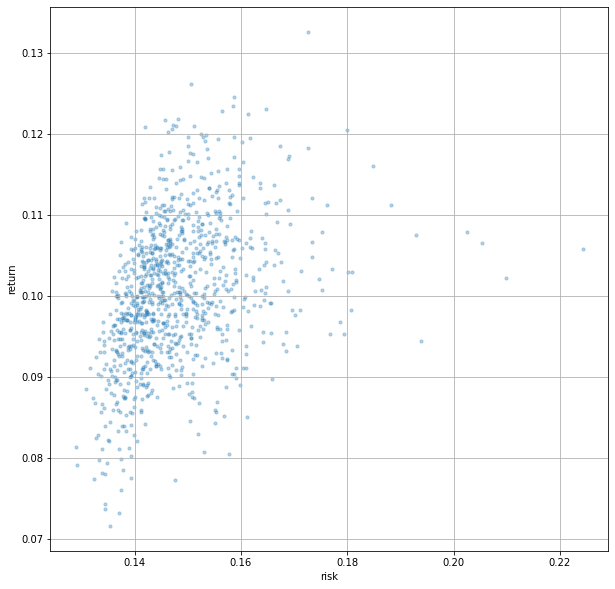

In [29]:
pf_output.plot.scatter("risk","return", marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10])

In [30]:
pf_max = pf_output.iloc[pf_output["sharpe"].argmax()]

In [31]:
pf_max

return                    0.120771
risk                      0.141988
sharpe                    0.850575
(Equity, CSPX.L)          0.271523
(Equity, MEUD.L)          0.072848
(Equity, CJPU.L)          0.218543
(Equity, ISP6.L)          0.003311
(Equity, CSEMUS.SW)       0.132450
(Equity, CECD.LN)         0.006623
(Equity, CEMA.L)          0.149007
(Equity, PAF.L)           0.082781
(Real Estate, IPRP.AS)    0.000000
(Commodities, CRB.PA)     0.062914
Name: 818, dtype: float64

In [32]:
pf_max.drop(["return","risk","sharpe"]).sum()

1.0

<AxesSubplot:>

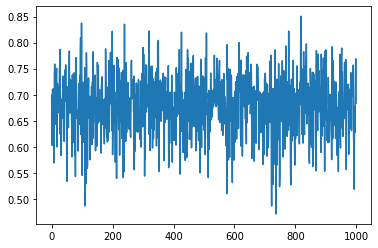

In [33]:
pf_output["sharpe"].plot()

<AxesSubplot:>

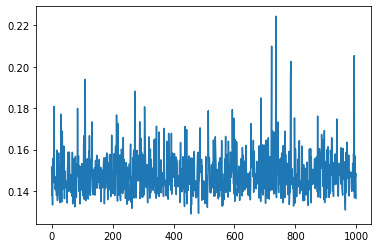

In [34]:
pf_output["risk"].plot()

In [35]:
pf_output.sort_values(by="sharpe", ascending=False).head()

,return,risk,sharpe,"(Equity, CSPX.L)","(Equity, MEUD.L)","(Equity, CJPU.L)","(Equity, ISP6.L)","(Equity, CSEMUS.SW)","(Equity, CECD.LN)","(Equity, CEMA.L)","(Equity, PAF.L)","(Real Estate, IPRP.AS)","(Commodities, CRB.PA)"
818,0.120771,0.141988,0.850575,0.271523,0.072848,0.218543,0.003311,0.132450,0.006623,0.149007,0.082781,0.000000,0.062914
98,0.126093,0.150562,0.837479,0.159794,0.175258,0.012887,0.208763,0.097938,0.023196,0.211340,0.059278,0.048969,0.002577
239,0.121675,0.145659,0.835342,0.221719,0.070136,0.031674,0.126697,0.133484,0.022624,0.214932,0.054299,0.108597,0.015837
320,0.121008,0.147145,0.822370,0.107759,0.148707,0.157328,0.206897,0.183190,0.025862,0.114224,0.036638,0.010776,0.008621
778,0.121765,0.148108,0.822138,0.185185,0.122685,0.185185,0.199074,0.071759,0.081019,0.101852,0.039352,0.002315,0.011574


In [36]:
pf_output.iloc[pf_output["return"].argmin()]

return                    0.071543
risk                      0.135296
sharpe                    0.528786
(Equity, CSPX.L)          0.075397
(Equity, MEUD.L)          0.115079
(Equity, CJPU.L)          0.079365
(Equity, ISP6.L)          0.083333
(Equity, CSEMUS.SW)       0.023810
(Equity, CECD.LN)         0.027778
(Equity, CEMA.L)          0.007937
(Equity, PAF.L)           0.111111
(Real Estate, IPRP.AS)    0.198413
(Commodities, CRB.PA)     0.277778
Name: 112, dtype: float64

In [37]:
#Solver

In [38]:
w = [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]

In [39]:
ret = np.dot(w,pf_stats["excess_return_pa"])
std = np.sqrt(cov_matrix_pa.mul(w, axis=0).mul(w, axis=1).sum().sum())
sharpe = np.dot(w,pf_stats["excess_return_pa"])/np.sqrt(cov_matrix_pa.mul(w, axis=0).mul(w, axis=1).sum().sum())
sharpe

0.7034319850159533

In [44]:
#Liner solver => not applicable to pf optimisation
#model = pulp.LpProblem("Maximize_Sharpe", sense=pulp.LpMaximize)

In [41]:
#x = [pulp.LpVariable(name=f"x{i}", lowBound=0) for i in range(1, 11)]

In [43]:
# model += pulp.lpSum(x)==1
# model += np.dot(x,pf_stats["excess_return_pa"])/np.sqrt(cov_matrix_pa.mul(x, axis=0).mul(x, axis=1).sum().sum())

In [47]:
'''
from cvxopt import matrix
from cvxopt.blas import dot 
from cvxopt.solvers import qp, options 

# Number of assets
n = 4
# Convariance matrix
S = matrix( [[ 4e-2,  6e-3, -4e-3,   0.0 ], 
             [ 6e-3,  1e-2,  0.0,    0.0 ],
             [-4e-3,  0.0,   2.5e-3, 0.0 ],
             [ 0.0,   0.0,   0.0,    0.0 ]] )
# Expected return
pbar = matrix([.12, .10, .07, .03])

# nxn matrix of 0s
G = matrix(0.0, (n,n))
# Convert G to negative identity matrix
G[::n+1] = -1.0
# nx1 matrix of 0s
h = matrix(0.0, (n,1))
# 1xn matrix of 1s
A = matrix(1.0, (1,n))
# scalar of 1.0
b = matrix(1.0)

N = 100
mus = [ 10**(5.0*t/N-1.0) for t in range(N) ]
options['show_progress'] = False
xs = [ qp(mu*S, -pbar, G, h, A, b)['x'] for mu in mus ]
returns = [ dot(pbar,x) for x in xs ]
risks = [ np.sqrt(dot(x, S*x)) for x in xs ]

#Efficient frontier
plt.plot(risks, returns)'''

"\nfrom cvxopt import matrix\nfrom cvxopt.blas import dot \nfrom cvxopt.solvers import qp, options \n\n# Number of assets\nn = 4\n# Convariance matrix\nS = matrix( [[ 4e-2,  6e-3, -4e-3,   0.0 ], \n             [ 6e-3,  1e-2,  0.0,    0.0 ],\n             [-4e-3,  0.0,   2.5e-3, 0.0 ],\n             [ 0.0,   0.0,   0.0,    0.0 ]] )\n# Expected return\npbar = matrix([.12, .10, .07, .03])\n\n# nxn matrix of 0s\nG = matrix(0.0, (n,n))\n# Convert G to negative identity matrix\nG[::n+1] = -1.0\n# nx1 matrix of 0s\nh = matrix(0.0, (n,1))\n# 1xn matrix of 1s\nA = matrix(1.0, (1,n))\n# scalar of 1.0\nb = matrix(1.0)\n\nN = 100\nmus = [ 10**(5.0*t/N-1.0) for t in range(N) ]\noptions['show_progress'] = False\nxs = [ qp(mu*S, -pbar, G, h, A, b)['x'] for mu in mus ]\nreturns = [ dot(pbar,x) for x in xs ]\nrisks = [ np.sqrt(dot(x, S*x)) for x in xs ]\n\n#Efficient frontier\nplt.plot(risks, returns)"

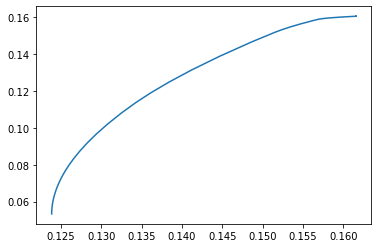

In [54]:
from cvxopt import matrix
from cvxopt.blas import dot 
from cvxopt.solvers import qp, options 

# Number of assets
n = 10
# Convariance matrix
S = matrix(np.array(cov_matrix_pa))
# Expected return
pbar = matrix(pf_stats["excess_return_pa"].values)

# nxn matrix of 0s
G = matrix(0.0, (n,n))
# Convert G to negative identity matrix
G[::n+1] = -1.0
# nx1 matrix of 0s
h = matrix(0.0, (n,1))
# 1xn matrix of 1s
A = matrix(1.0, (1,n))
# scalar of 1.0
b = matrix(1.0)

N = 100 # number of runs
mus = [ 10**(5.0*t/N-1.0) for t in range(N) ]
options['show_progress'] = False
xs = [ qp(mu*S, -pbar, G, h, A, b)['x'] for mu in mus ]
returns = [ dot(pbar,x) for x in xs ]
risks = [ np.sqrt(dot(x, S*x)) for x in xs ]

#Efficient frontier
plt.plot(risks, returns)

In [93]:
solution = pd.DataFrame([returns,risks])

In [95]:
solution = solution.transpose()
solution.columns = ["return", "risk"]

In [96]:
solution

,return,risk
0,0.160378,0.161563
1,0.160378,0.161563
2,0.160378,0.161563
3,0.160378,0.161563
4,0.160378,0.161563
...,...,...
95,0.053427,0.123848
96,0.053407,0.123848
97,0.053389,0.123848
98,0.053371,0.123848


In [65]:
solution_weights_names = [n[1] for n in pf_components]

In [68]:
x_list = []
for x in xs:
    x_list.append(np.array(x))

In [79]:
w_list = []
for x in x_list:
    for n in x:
        w_list.append(n[0])

In [84]:
w_solution = np.array(w_list)
w_solution =w_solution.reshape(100,10)
test = pd.DataFrame(w_solution)

In [86]:
test.columns = solution_weights_names

In [108]:
test.sum(axis=1).sum()

100.0

In [98]:
solution = pd.concat([solution,test],axis=1)

In [100]:
solution["sharpe"] = solution["return"] / solution["risk"]

In [101]:
solution = solution.apply(lambda x: np.round(x,2))

In [106]:
solution.iloc[solution["sharpe"].argmax()]

return       0.16
risk         0.16
CSPX.L       0.97
MEUD.L       0.00
CJPU.L       0.00
ISP6.L       0.00
CSEMUS.SW    0.00
CECD.LN      0.00
CEMA.L       0.00
PAF.L        0.03
IPRP.AS      0.00
CRB.PA       0.00
sharpe       1.01
Name: 27, dtype: float64

<AxesSubplot:>

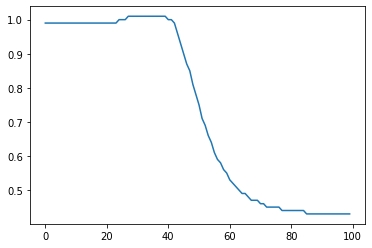

In [109]:
solution["sharpe"].plot()

<AxesSubplot:xlabel='risk'>

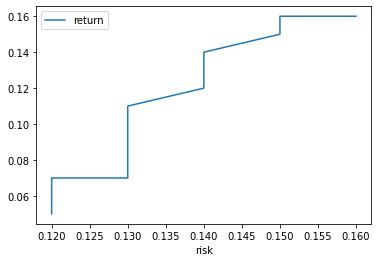

In [114]:
solution.plot("risk", "return")

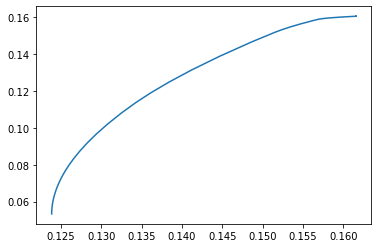

In [112]:
plt.plot(risks, returns)